# Scatterplots of active region statistics

### Preamble

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools
import pandas as pd


A = np.fromfile('axcollect_correct.dat',dtype=np.float32)
A = A.reshape(951,164)

N = np.fromfile('npole_correct.dat',dtype=np.float32)
N = N.reshape(951,164)

S = np.fromfile('spole_correct.dat',dtype=np.float32)
S = S.reshape(951,164)

axdipole2 = np.fromfile('axdipole2.dat',dtype=np.float32)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(951):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    index_npole = np.nonzero(A[i,:]);
    start_npole.append(index_npole[0][0]);
    begin_npole.append(N[i,start_npole[i]]);
    index_spole = np.nonzero(S[i,:]);
    start_spole.append(index_spole[0][0]);
    begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
start_npole = np.asarray(start_npole)
start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
begin_npole = np.asarray(begin_npole)
begin_spole = np.asarray(begin_spole)

final = A[:,163]
final_rel = final/(axdipole2[163]-axdipole2[0])
final_npole = N[:,163]
final_spole = S[:,163]

total = []
total_npole = []
total_spole = []
for i in range(164):
    total.append(sum(A[:,i]))
    total_npole.append(sum(N[:,i]))
    total_spole.append(sum(S[:,i]))

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/951*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
reg_percent_npole = strong_npole.size/951*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
reg_percent_spole = strong_spole.size/951*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_collect.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_collect.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_collect.dat',dtype=np.float32)
angle = np.fromfile('angle_collect.dat',dtype=np.float32)

a = [(initflux),(initflux2),(reg_lat),(start),(final_rel),(angle)]
a = np.asarray(a)
a = np.transpose(a)
b = sorted(a, key=lambda column: np.abs(column[4]))
b = np.transpose(b)

c = sorted(a, key=lambda column: np.abs(column[1]))
c = np.transpose(c)

### Plots

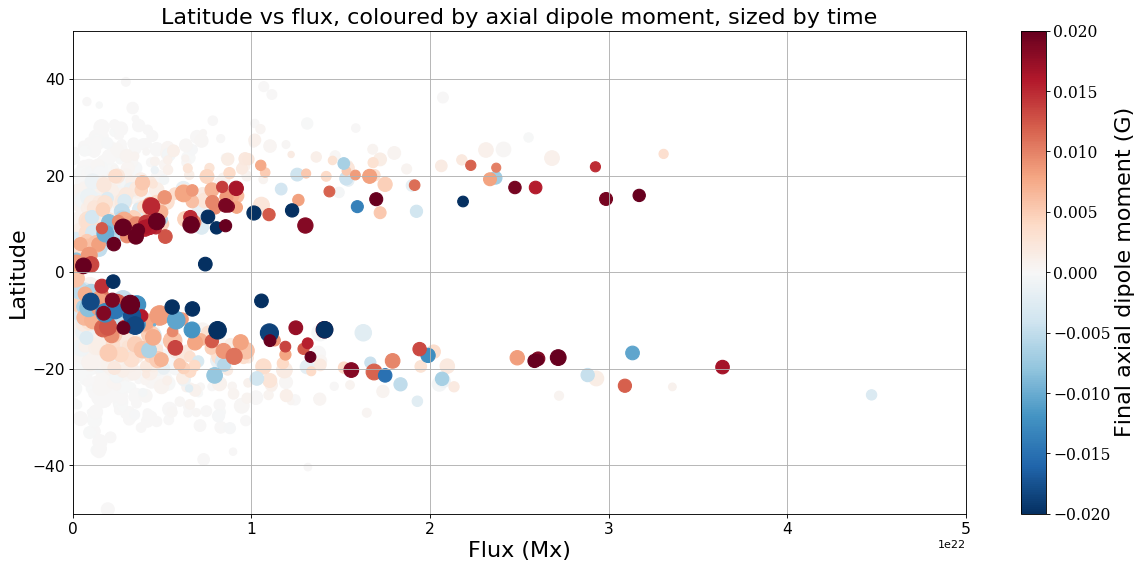

In [29]:
fig1 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(b[1]),b[2],2*b[3],b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,5e22)
plot = fig1.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.title('Latitude vs flux, coloured by axial dipole moment, sized by time',fontsize=20)
plt.grid()
plt.show()

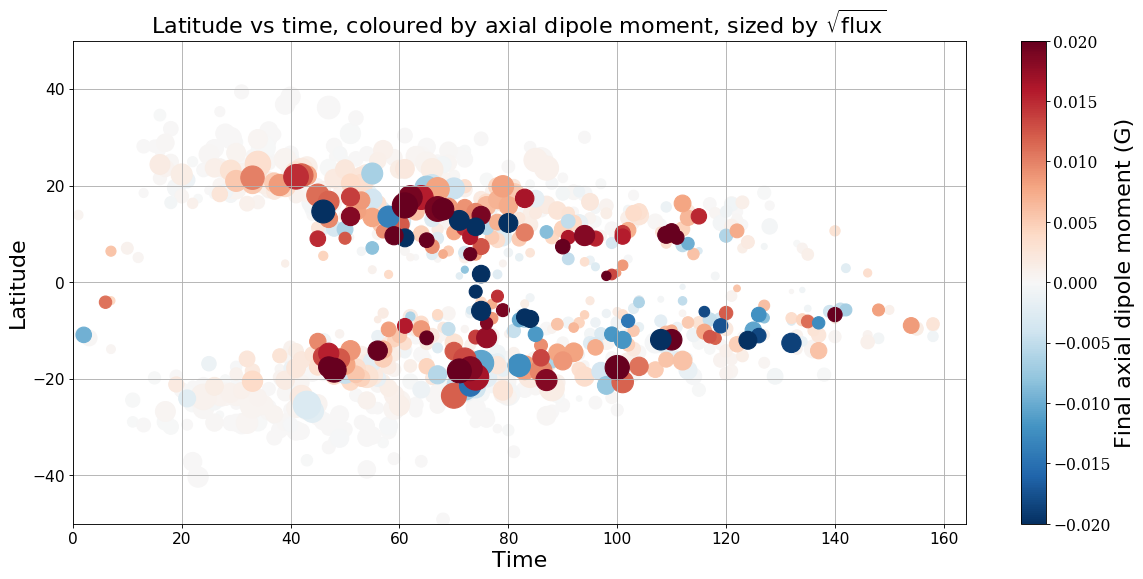

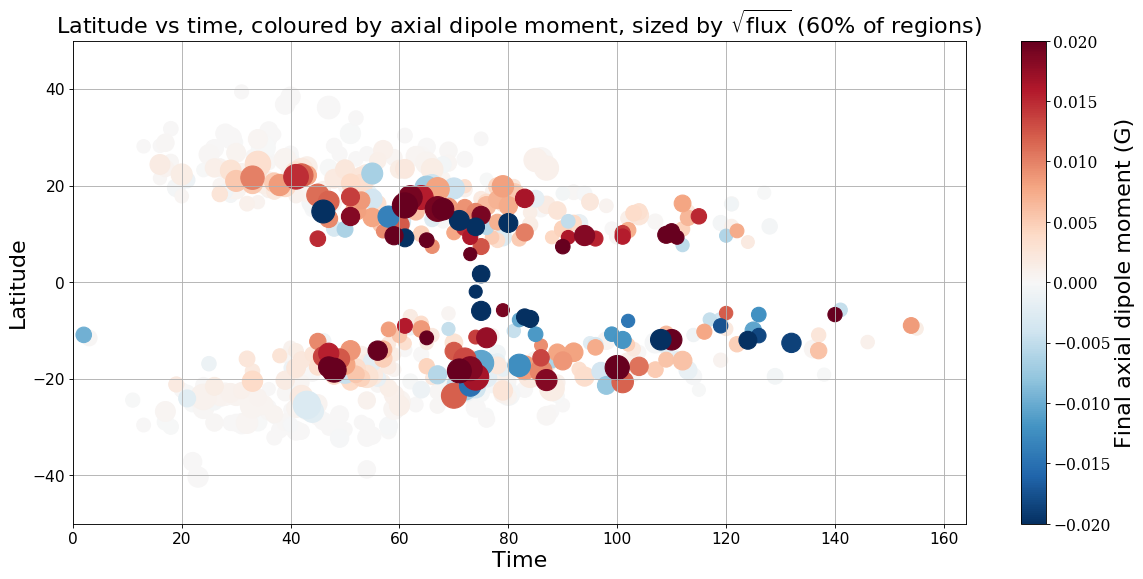

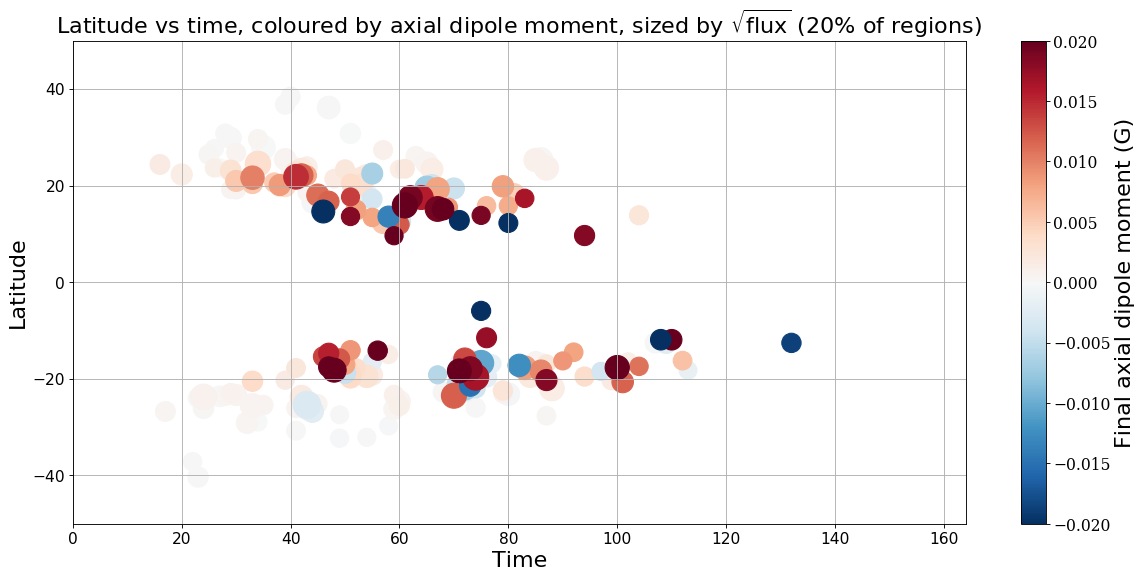

In [30]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(b[3][1:950],b[2][1:950],200*np.sqrt(abs(b[0][1:950])),b[4][1:950],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by axial dipole moment, sized by $\sqrt{\mathrm{flux}}$',fontsize=20)
plt.grid()
plt.show()

        
thresh_flux = 2.12e21;
strong_flux = np.asarray(np.where(abs(b[1])>thresh_flux))
weak_flux = np.asarray(np.where(abs(b[1])<thresh_flux))
reg_percent_flux = strong_flux.size/951*100;
#print(reg_percent_flux)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(b[3][strong_flux],b[2][strong_flux],200*np.sqrt(abs(b[0][strong_flux])),b[4][strong_flux],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by axial dipole moment, sized by $\sqrt{\mathrm{flux}}$ (60% of regions)',fontsize=20)
plt.grid()
plt.show()


thresh_flux = 8.12e21;
strong_flux = np.asarray(np.where(abs(b[1])>thresh_flux))
weak_flux = np.asarray(np.where(abs(b[1])<thresh_flux))
reg_percent_flux = strong_flux.size/951*100;
#print(reg_percent_flux)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(b[3][strong_flux],b[2][strong_flux],200*np.sqrt(abs(b[0][strong_flux])),b[4][strong_flux],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by axial dipole moment, sized by $\sqrt{\mathrm{flux}}$ (20% of regions)',fontsize=20)
plt.grid()
plt.show()

## Cut-off above is by flux

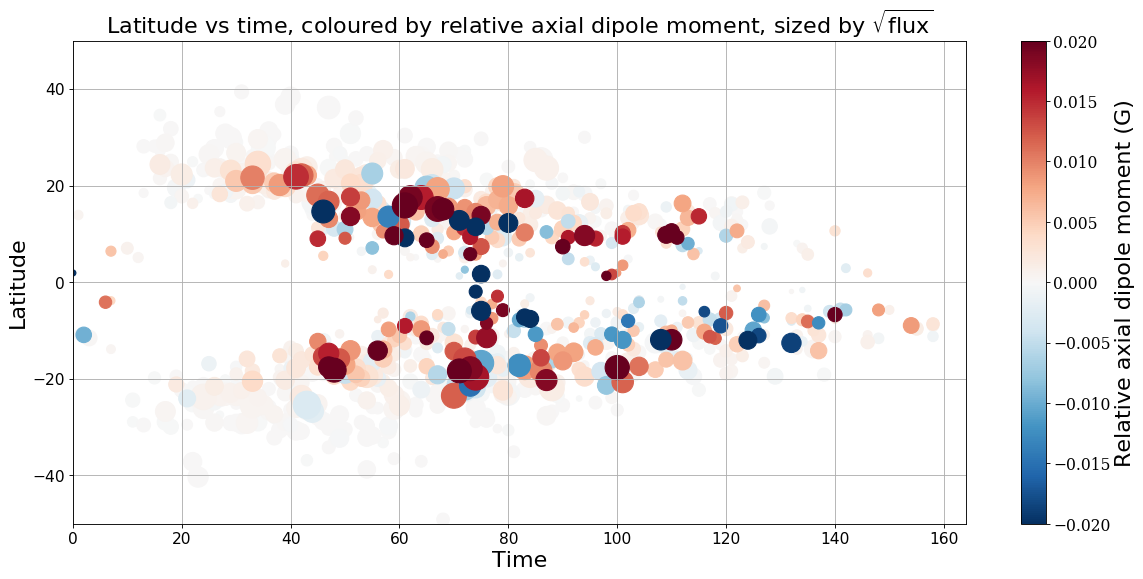

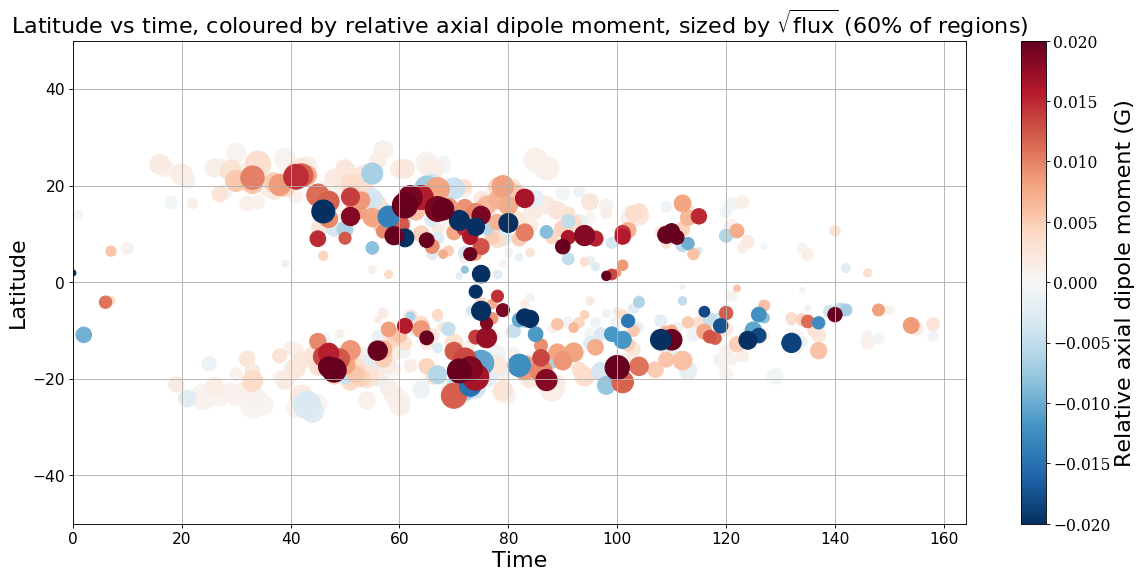

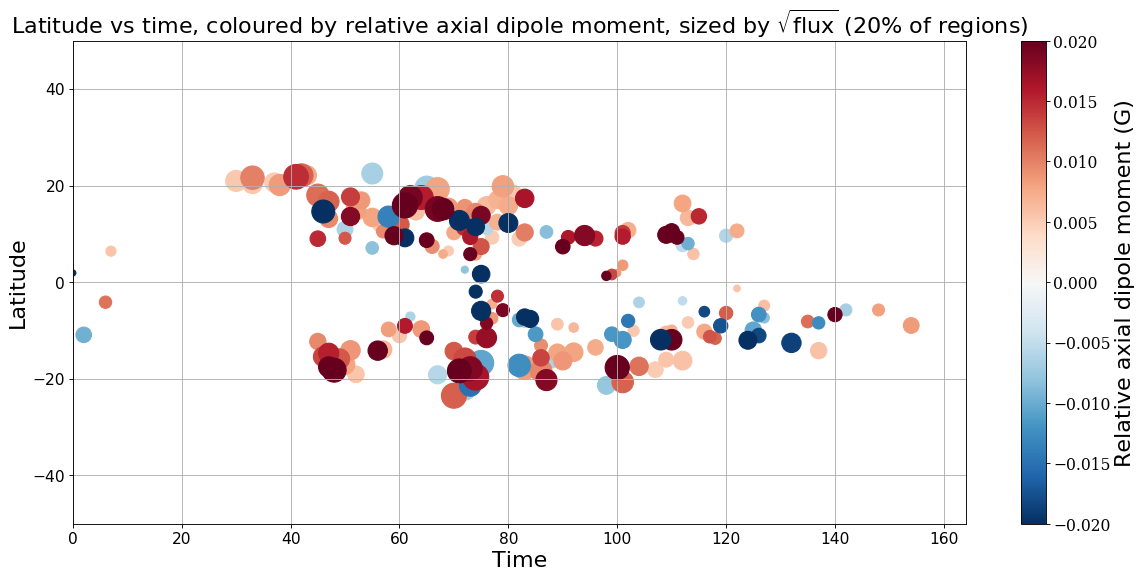

In [31]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(b[3],b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by relative axial dipole moment, sized by $\sqrt{\mathrm{flux}}$',fontsize=20)
plt.grid()
plt.show()

        
thresh_rel = 0.00052;
strong_rel = np.asarray(np.where(abs(b[4])>thresh_rel))
weak_rel = np.asarray(np.where(abs(b[4])<thresh_rel))
reg_percent_rel = strong_rel.size/951*100;
#print(reg_percent_rel)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(b[3][strong_rel],b[2][strong_rel],200*np.sqrt(abs(b[0][strong_rel])),b[4][strong_rel],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by relative axial dipole moment, sized by $\sqrt{\mathrm{flux}}$ (60% of regions)',fontsize=20)
plt.grid()
plt.show()



thresh_rel = 0.005;
strong_rel = np.asarray(np.where(abs(b[4])>thresh_rel))
weak_rel = np.asarray(np.where(abs(b[4])<thresh_rel))
reg_percent_rel = strong_rel.size/951*100;
#print(reg_percent_rel)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(b[3][strong_rel],b[2][strong_rel],200*np.sqrt(abs(b[0][strong_rel])),b[4][strong_rel],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by relative axial dipole moment, sized by $\sqrt{\mathrm{flux}}$ (20% of regions)',fontsize=20)
plt.grid()
plt.show()

## Cut-off above is by relative axial dipole moment

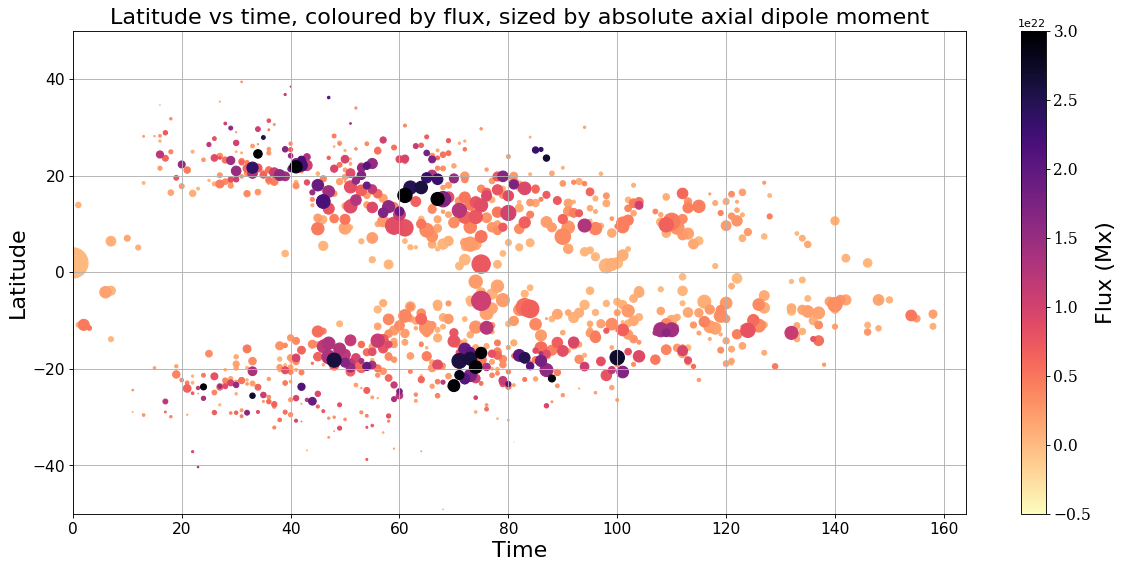

In [32]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(c[3][1:950],c[2][1:950],1000*np.sqrt(abs(c[4][1:950])),abs(c[1][1:950]),cmap='magma_r',vmin=-5e21,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,164)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Latitude vs time, coloured by flux, sized by absolute axial dipole moment',fontsize=20)
plt.grid()
plt.show()

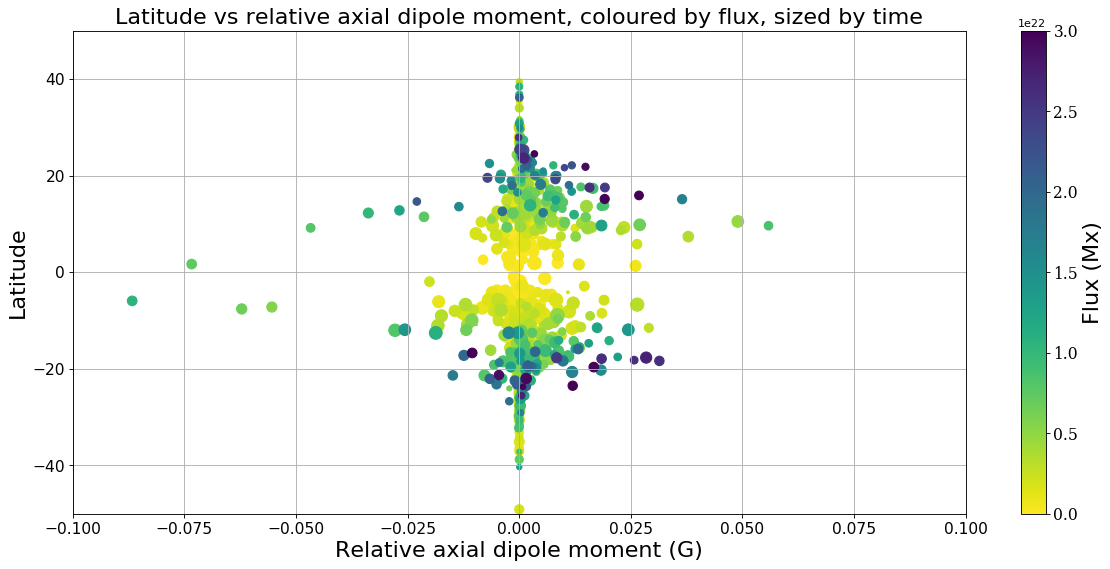

In [33]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(c[4][1:950],c[2][1:950],c[3][1:950],abs(c[1][1:950]),cmap='viridis_r',vmin=0,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Relative axial dipole moment (G)',fontsize=20)
plt.title('Latitude vs relative axial dipole moment, coloured by flux, sized by time',fontsize=20)
plt.grid()
plt.show()

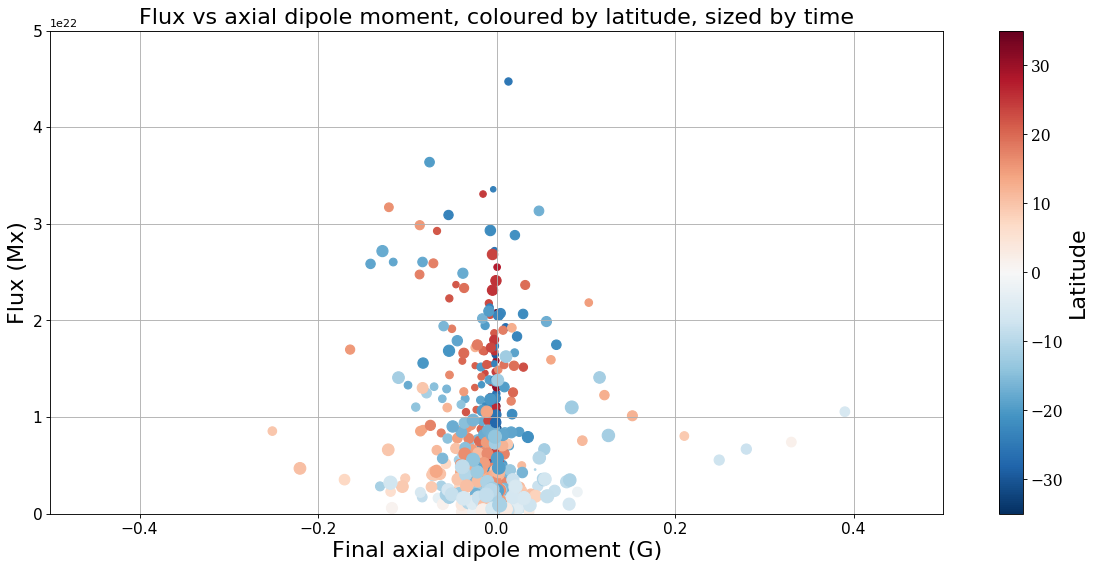

In [34]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(final[1:950],abs(initflux2[1:950]),start[1:950],reg_lat[1:950],cmap='RdBu_r',vmin=-35,vmax=35)
cb_label = 'Latitude'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(0,5e22)
plt.xlim(-0.5,0.5)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Flux (Mx)',fontsize=20)
plt.xlabel('Final axial dipole moment (G)',fontsize=20)
plt.title('Flux vs axial dipole moment, coloured by latitude, sized by time',fontsize=20)
plt.grid()
plt.show()

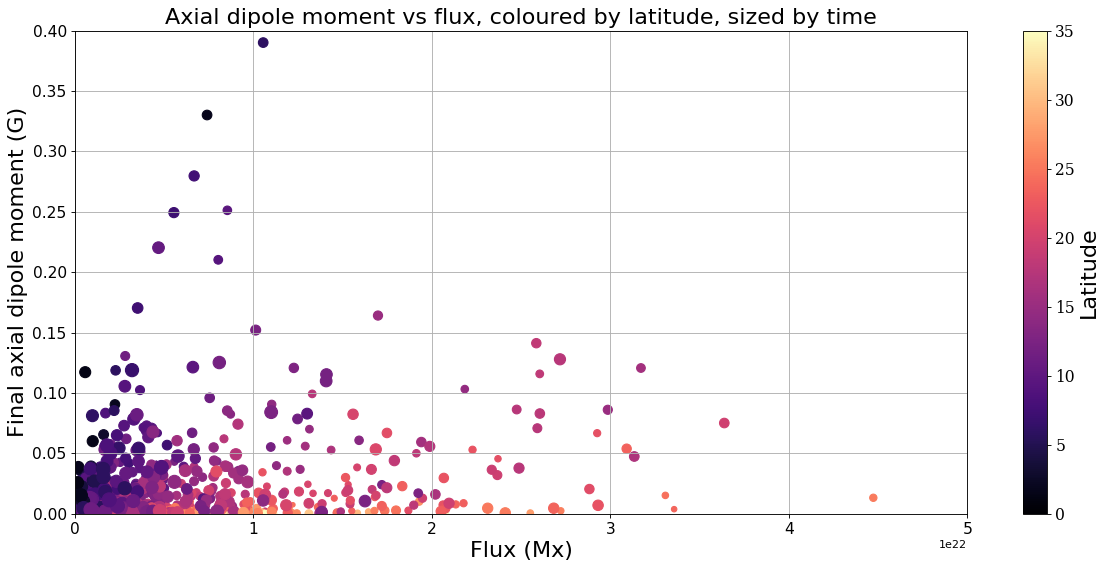

In [35]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(initflux2[1:950]),abs(final[1:950]),start[1:950],abs(reg_lat[1:950]),cmap='magma',vmin=0,vmax=35)
cb_label = 'Latitude'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(0,5e22)
plt.ylim(0,0.4)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.ylabel('Final axial dipole moment (G)',fontsize=20)
plt.title('Axial dipole moment vs flux, coloured by latitude, sized by time',fontsize=20)
plt.grid()
plt.show()

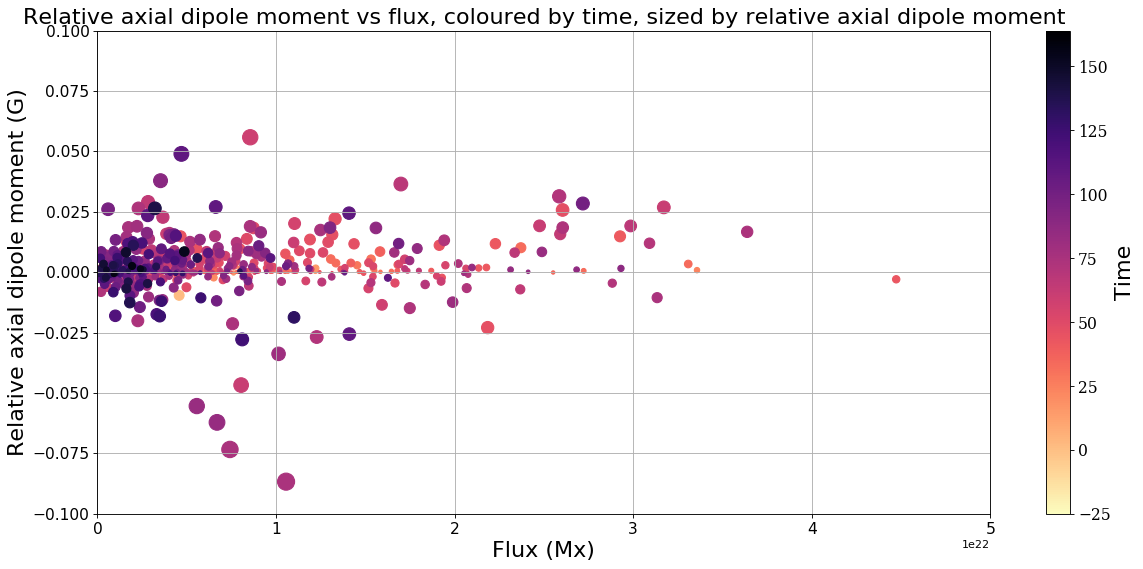

In [36]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(initflux2[1:950]),final_rel[1:950],800*np.sqrt(abs(final_rel[1:950])),start[1:950],cmap='magma_r',vmin=-25,vmax=164)
cb_label = 'Time'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(0,5e22)
plt.ylim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.ylabel('Relative axial dipole moment (G)',fontsize=20)
plt.title('Relative axial dipole moment vs flux, coloured by time, sized by relative axial dipole moment',fontsize=20)
plt.grid()
plt.show()

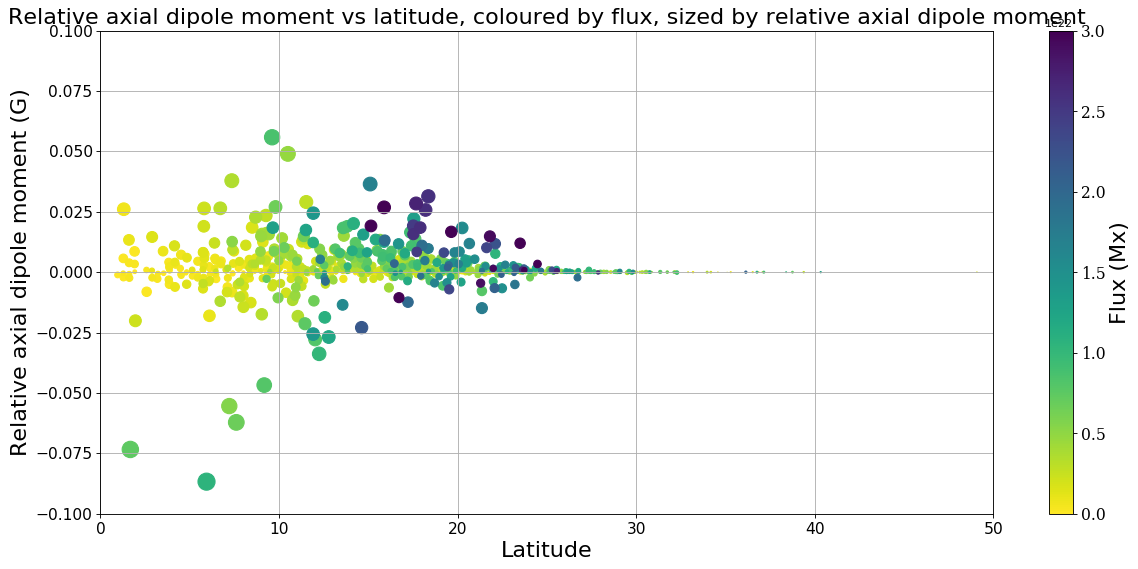

In [37]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(c[2][1:950]),c[4][1:950],800*np.sqrt(abs(c[4][1:950])),abs(c[1][1:950]),cmap='viridis_r',vmin=0,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(0,50)
plt.ylim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Relative axial dipole moment (G)',fontsize=20)
plt.title('Relative axial dipole moment vs latitude, coloured by flux, sized by relative axial dipole moment',fontsize=20)
plt.grid()
plt.show()

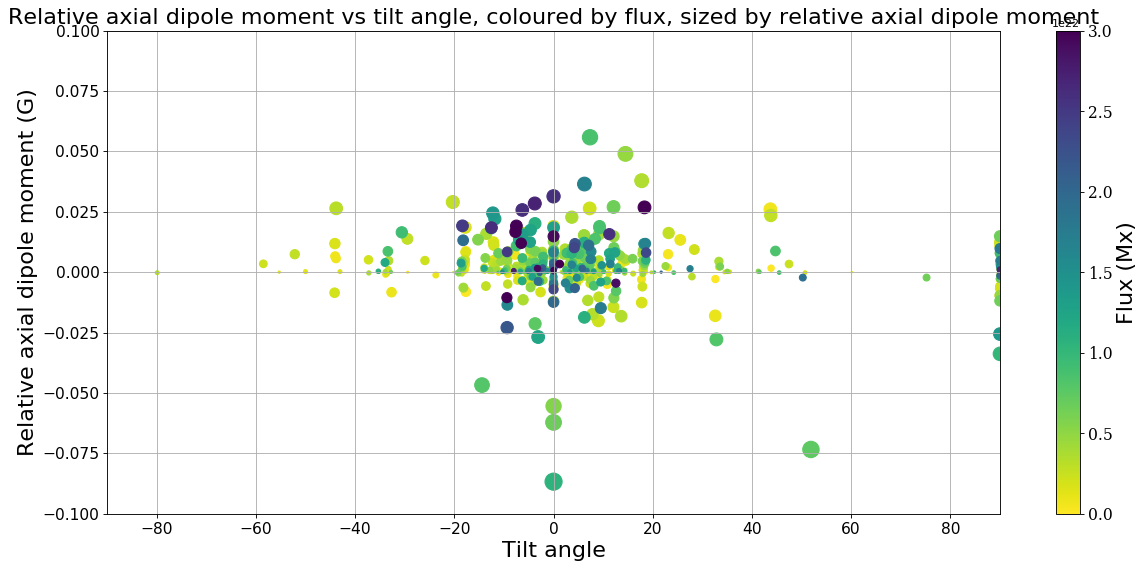

In [40]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(c[5][1:950],c[4][1:950],800*np.sqrt(abs(c[4][1:950])),abs(c[1][1:950]),cmap='viridis_r',vmin=0,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(-90,90)
plt.ylim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Tilt angle',fontsize=20)
plt.ylabel('Relative axial dipole moment (G)',fontsize=20)
plt.title('Relative axial dipole moment vs tilt angle, coloured by flux, sized by relative axial dipole moment',fontsize=20)
plt.grid()
plt.show()

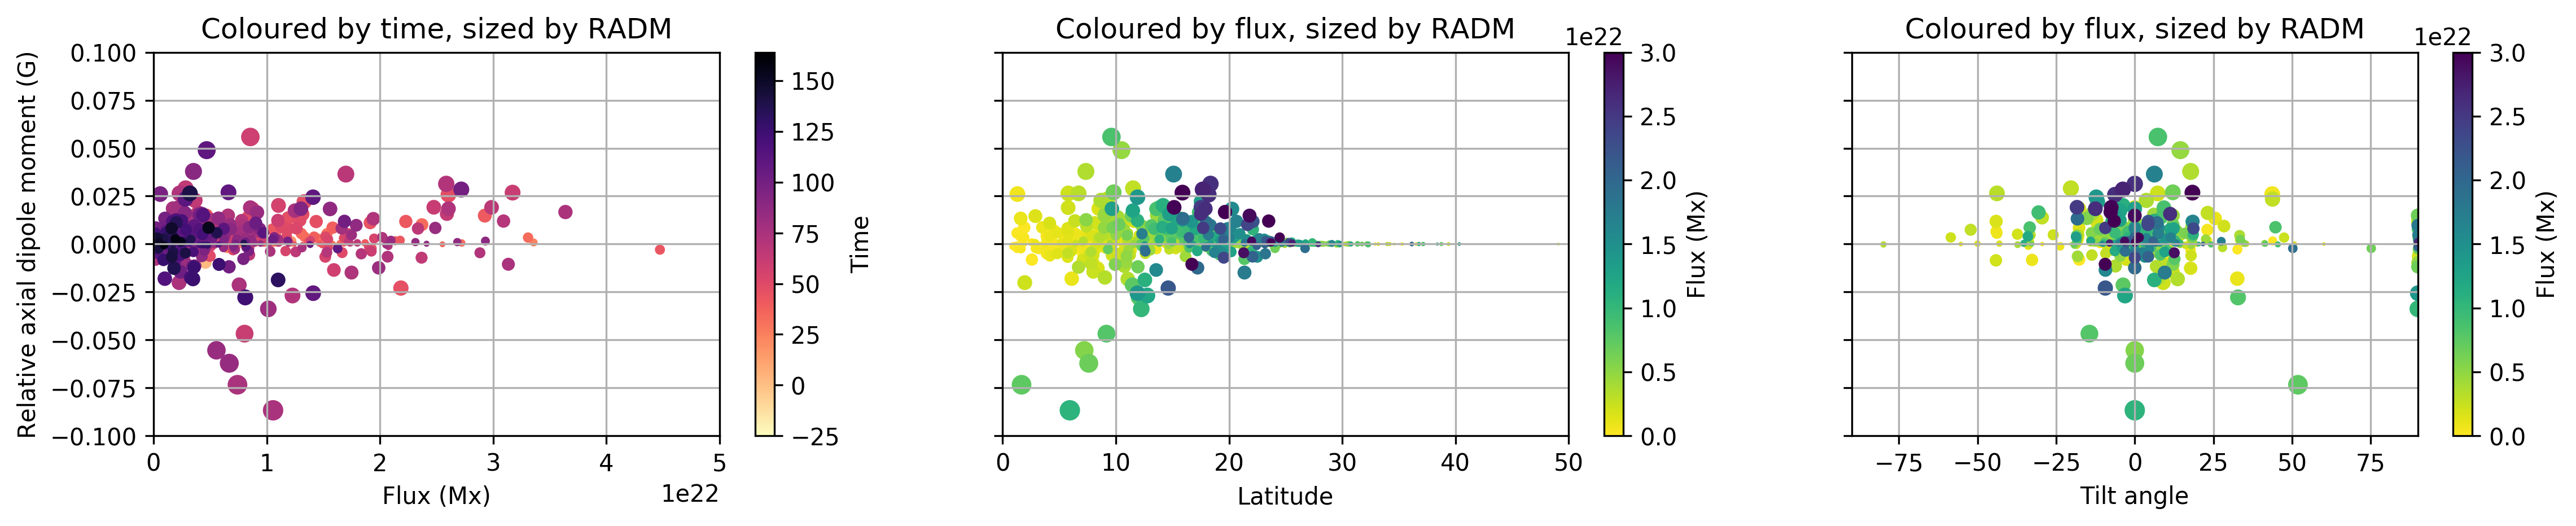

In [42]:
dpi = 300
pxx = 5500   # Horizontal size of each panel
pxy = 300    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 0 #Vertical padding in pixels
padv2 = 0 #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units


# Two subplots, unpack the axes array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(fszh/dpi,fszv/dpi), dpi = dpi)
im = ax1.scatter(abs(initflux2[1:950]),final_rel[1:950],200*np.sqrt(abs(final_rel[1:950])),start[1:950],cmap='magma_r',vmin=-25,vmax=164)
ax1.set_xlabel('Flux (Mx)')
ax1.set_xlim(0,5e22)
ax1.set_ylim(-0.1,0.1)
ax1.set_ylabel('Relative axial dipole moment (G)')
ax1.set_title('Coloured by time, sized by RADM')
ax1.grid()
im2 = ax2.scatter(abs(c[2][1:950]),c[4][1:950],200*np.sqrt(abs(c[4][1:950])),abs(c[1][1:950]),cmap='viridis_r',vmin=0,vmax=3e22)
ax2.set_xlabel('Latitude')
ax2.set_xlim(0,50)
ax2.set_title('Coloured by flux, sized by RADM')
ax2.grid()
im3 = ax3.scatter(c[5][1:950],c[4][1:950],200*np.sqrt(abs(c[4][1:950])),abs(c[1][1:950]),cmap='viridis_r',vmin=0,vmax=3e22)
ax3.set_xlabel('Tilt angle')
ax3.set_title('Coloured by flux, sized by RADM')
ax3.set_xlim(-90,90)
ax3.grid()
cb_label = 'Time'
cb = f.colorbar(im,ax=ax1)
cb.set_label(cb_label)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
cb_label = 'Flux (Mx)'
cb = f.colorbar(im3,ax=ax2)
cb.set_label(cb_label)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
cb_label = 'Flux (Mx)'
cb = f.colorbar(im3,ax=ax3)
cb.set_label(cb_label)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')


plt.show()

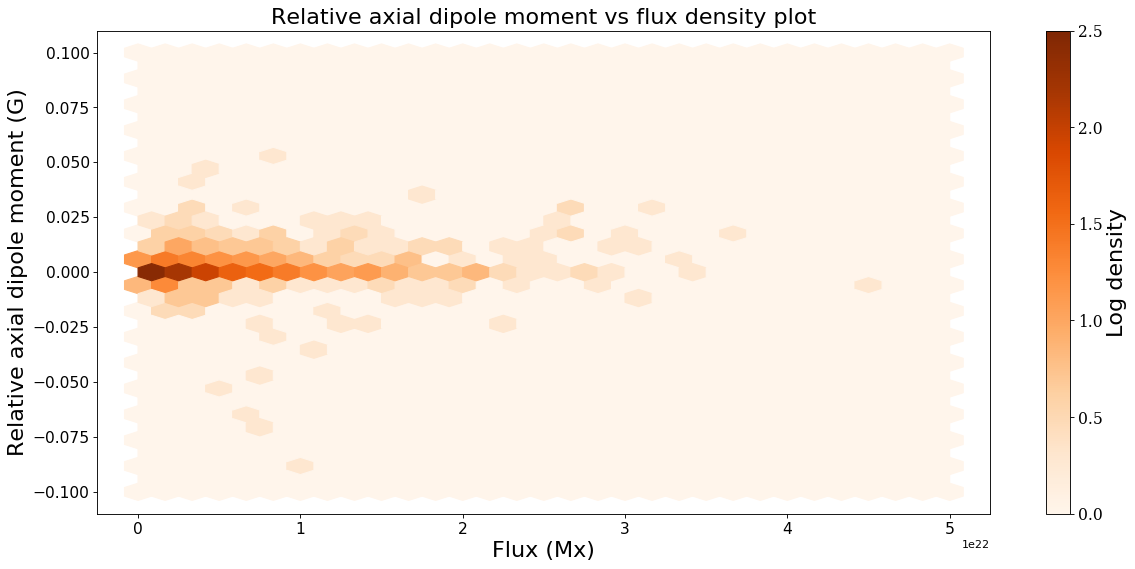

In [31]:
fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.hexbin(abs(initflux2[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[0, 5e22, -0.1, 0.1])
cb_label = 'Log density'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.ylabel('Relative axial dipole moment (G)',fontsize=20)
plt.title('Relative axial dipole moment vs flux density plot',fontsize=20)
plt.show()

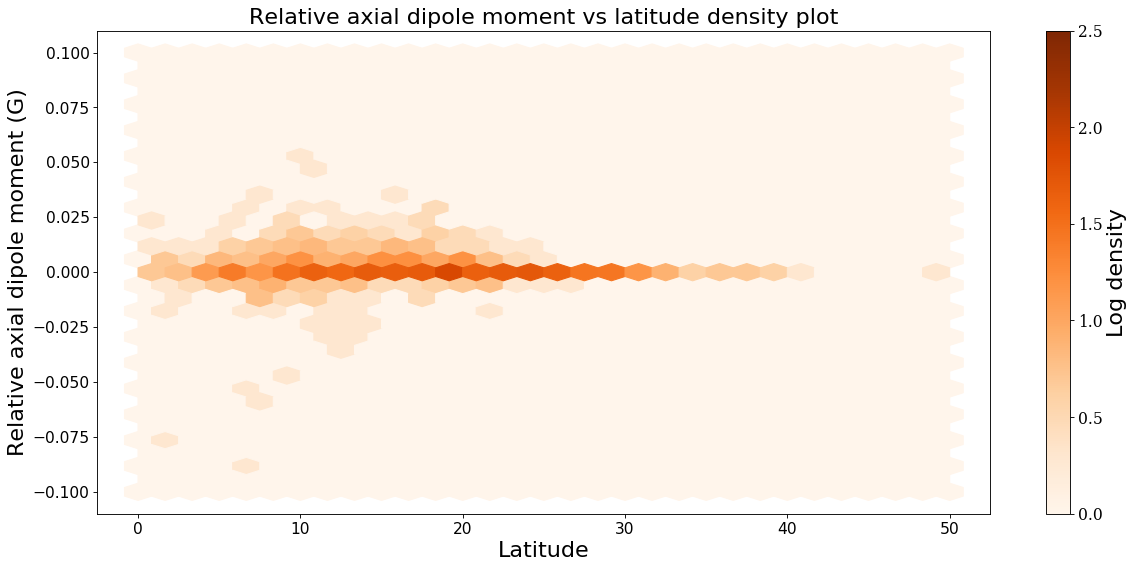

In [30]:
fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.hexbin(abs(reg_lat[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[-0, 50, -0.1, 0.1])
cb_label = 'Log density'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Relative axial dipole moment (G)',fontsize=20)
plt.title('Relative axial dipole moment vs latitude density plot',fontsize=20)
plt.show()

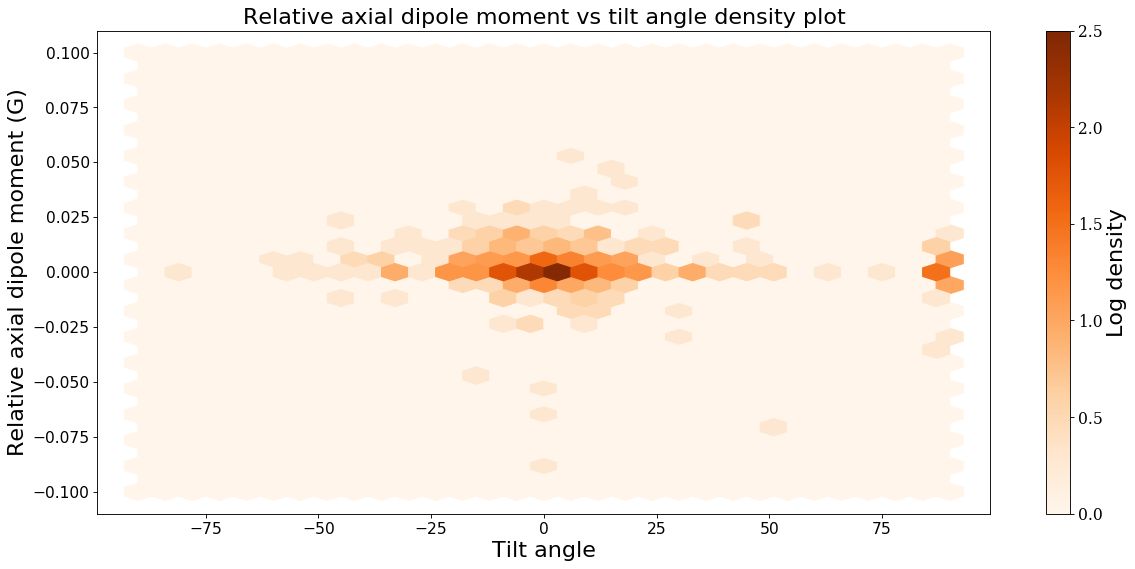

In [29]:
fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.hexbin(angle[1:950],final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[-90, 90, -0.1, 0.1])
cb_label = 'Log density'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Tilt angle',fontsize=20)
plt.ylabel('Relative axial dipole moment (G)',fontsize=20)
plt.title('Relative axial dipole moment vs tilt angle density plot',fontsize=20)
plt.show()

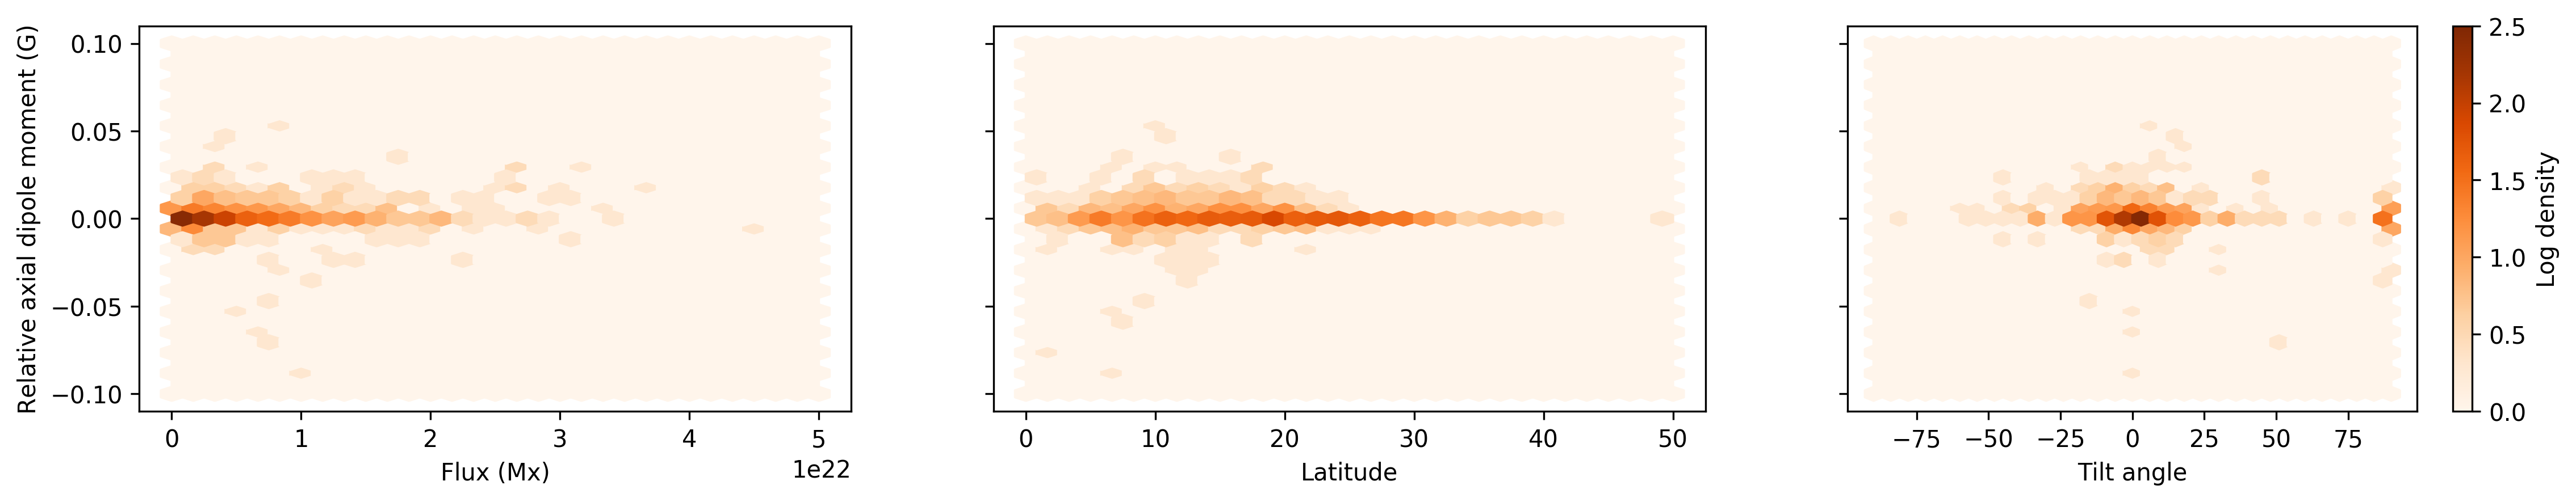

In [35]:
dpi = 300
pxx = 5500   # Horizontal size of each panel
pxy = 300    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 0 #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )          #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units


# Two subplots, unpack the axes array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(fszh/dpi,fszv/dpi), dpi = dpi)
ax1.hexbin(abs(initflux2[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[0, 5e22, -0.1, 0.1])
ax1.set_xlabel('Flux (Mx)')
ax1.set_ylabel('Relative axial dipole moment (G)')
ax2.hexbin(abs(reg_lat[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[0, 50, -0.1, 0.1])
ax2.set_xlabel('Latitude')
im3 = ax3.hexbin(angle[1:950],final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[-90, 90, -0.1, 0.1])
ax3.set_xlabel('Tilt angle')
cb_label = 'Log density'
cb = f.colorbar(im3,ax=ax3)
cb.set_label(cb_label)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')


plt.show()